In [1]:
import pandas as pds
import matplotlib.pyplot as plt

In [2]:
def read_file(fname):
    with open(fname) as f:
        content = f.readlines()
    # you may also want to remove whitespace characters like `\n` at the end of each line
    content = [x.strip() for x in content]
    
    return pds.DataFrame(content)

In [3]:
train = pds.concat([read_file('x_train.txt'), read_file('y_train.txt')], axis=1)
train.columns = ['x', 'label']

test = pds.concat([read_file('x_test.txt'), read_file('y_test.txt')], axis=1)
test.columns = ['x', 'label']

train['cat'] = train.label.factorize()[0]

In [15]:
vocab = set()

In [17]:
for idx, sent in train.iterrows():
    for w in sent.x.split(" "):
        vocab.add(w)

In [ ]:
len(vocab)

In [21]:
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

In [ ]:
from gensim.models import Word2Vec

-----

In [4]:
lens = train.x.str.len()
tlens = test.x.str.len()

In [5]:
lens.sort_values(ascending=False)[0:60]

112470    40578
116309    36022
29377     35980
88875     34656
75917     31160
11553     29512
32458     29411
42017     28755
67352     22302
36372     22016
4275      18894
10386     18866
45099     18476
40226     18033
75135     17169
86563     14463
72859     14124
46539     13707
106554    12358
47391     11827
2268      11586
89868     11576
49720     11258
107092    10971
51950     10901
36812     10768
8277      10475
99965     10217
73203      9573
8815       9504
10109      9078
102665     8723
107715     8654
109547     8125
45845      8098
98152      8026
97994      7995
8271       7853
2848       7743
12717      7719
53004      7704
109284     7700
91424      7510
25593      7498
26948      7369
73738      7353
88924      7225
111760     7208
111868     6918
21446      6821
49383      6597
91935      6492
34189      6383
106373     6265
23205      6194
81528      5940
31738      5884
88590      5827
3046       5826
112014     5762
Name: x, dtype: int64

In [42]:
print(test[test.x.str.len() == 195402].x)

24169    འཁོར་བའི་བྱ་བཞག་སྙིང་པོ་མེད་པར་དགོངས། །སྙིང་རྗ...
Name: x, dtype: object


In [43]:
test.iloc[24169].values

array(['འཁོར་བའི་བྱ་བཞག་སྙིང་པོ་མེད་པར་དགོངས། །སྙིང་རྗེ་ཆེན་པོས་གཞན་དོན་འབའ་ཞིག་གཉེར། །སྲིད་ཞིར་མ་ཞེན་ཐེག་ཆེན་གཞུང་བཞིན་མཛད། །མཚུངས་མེད་བླ་མའི་ཞབས་ལ་ཕྱག་འཚལ་ལོ། མགོན་པོ་ཀླུ་སྒྲུབ་ཀྱིས། མ་ཡི་ཐུག་མཐའ་རྒྱ་ཤུག་ཚིག་གུ་ཙམ། །རིལ་བུར་དྲིལ་ཀྱང་ས་ཡིས་ལོངས་མི་འགྱུར། །ཞེས་གསུངས། དེ་བཞིན་དུ་འཁོར་བ་ཐོག་མ་མེད་པ་ནས། ད་ལྟའི་བར་དུ་སྐྱེ་བ་འདི་མ་བླངས་བྱ་བ་མེད་པས་འདོད་པའི་ཕྱིར་མགོ་དང་ཡན་ལག་བཅད་པའང་གྲངས་ཀྱིས་མི་ཆོད། གྲོག་སྤུར་ལ་སོགས་སྲོག་ཆགས་ཕྲ་མོར་སྐྱེས་པའི་ཡན་ལག་རྣམས་ད་ལྟ་གཅིག་ཏུ་བསྡམ་རྒྱུ་ཡོད་ན་རི་ཡི་རྒྱལ་པོ་རི་རབ་ལས་ཀྱང་མཐོ། ཁ་ལ་ཟས་མེད་རྒྱབ་ལ་གོས་མེད། འཁྱག་ལྟོག་སྐོམ་གསུམ་ལ་སོགས་པའི་སྡུག་བསྔལ་མྱོང་ནས་ངུས་པའི་མཆི་མ་ཐམས་ཅད་མ་སྐམ་པར་བསགས་ན་མཐའི་རྒྱལ་མཚོ་ཆེན་པོ་ལས་ཀྱང་མང། དམྱལ་བའི་གནས་སུ་སྐྱེས་ཏེ་ཟངས་ཞུན་ཁོལ་མ་ཁོ་ན་རང་ཕྱོགས་ཀྱི་རྒྱ་མཚོ་ཆེན་པོ་བཞི་ལས་མང་བ་ཞིག་བཏུང་བ་ཡིན་ཀྱང། ད་དུང་འཁོར་བའི་གནས་རིས་འདི་ལ་སྐྱོ་བའི་བློ་སྐད་ཅིག་ཀྱང་མི་སྐྱེ་བར་ཞེན་ཅིང་ཆགས་པས་བཅིངས་པ་རྣམས། འཁོར་བ་མཐའ་མེད་དུ་སྔར་གྱི་སྡུག་བསྔལ་དེ་ལས་ཀྱང་མང་བར་མྱོང་དགོས་པ་ཡིན། གལ་སྲིད་བསོད་ནམས་ཆ་མཐུན་གྱི་དགེ་འབྲས་ཕྲན་བུ་རེས་ཚངས་པ་དང་ལྷའི་དབང་པོ་ལྟ་བུ་

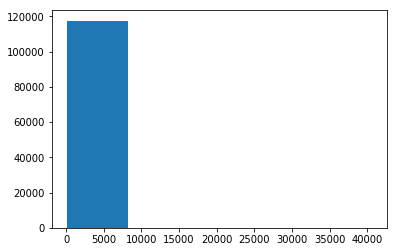

In [23]:
plt.hist(lens.values, 5)
plt.show()

In [57]:
test[test.label == 'nob']

,x,label
48,Gârleșteanu vant en olympisk bronsemedalje i r...,nob
59,"To måneder etter Kings død, ble den tidligere ...",nob
150,"Skottlands flagg, «Saltire» eller «St Andrew's...",nob
522,Laget spilte sin første landskamp hjemme mot K...,nob
776,En viktig samtidig kritikk av Frazers evolusjo...,nob
1158,Ved å sammenligne éneggede og toeggede tvillin...,nob
1249,På slutten av 1960-tallet knyttet Harrison et ...,nob
1389,I mai-juni 1940 var Haakon personlig usikker p...,nob
1648,Buffy begynner på skolen Sunnydale High. Der j...,nob
1728,Serien har vunnet en rekke priser i USA. I 200...,nob
